In [1]:
#Action Space: {1,2,3,4}
#Distribution of Rewards Associated with each Arm: {N(0,1), N(0,0.7), N(0, 0.2), N(0.2, 0.5)}
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import random

# Q1 in pdf

# Q2

In [2]:
def bandit(a):
    if a==0:
        r = np.random.normal(0,1)
    if a==1:
        r = np.random.normal(0,0.7)
    if a==2:
        r = np.random.normal(0,0.2)
    if a==3:
        r = np.random.normal(0.2,0.5)
    return r

# epsilon = [0.2, 0.8, 0, 1]

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 50043.60it/s]


[ 75.  46. 426. 453.]


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 50038.82it/s]


[217. 281. 283. 219.]


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 35746.40it/s]


[  1.   1.   1. 997.]


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 62546.47it/s]


[235. 259. 227. 279.]
[0.1564243784547997, 0.037448540254190525, 0.11374700446615658, 0.05323180416303704]


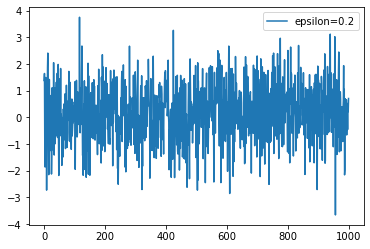

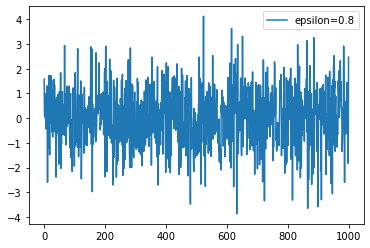

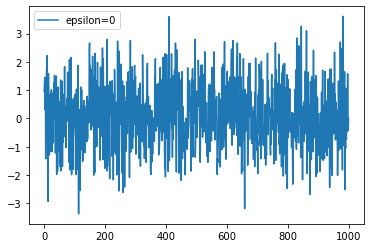

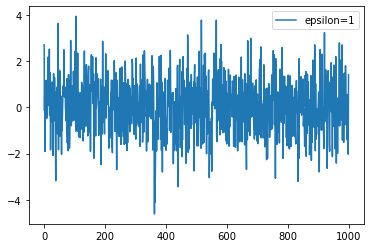

In [3]:
k = 4
time = 1000
rewards = np.zeros(time)
q = np.zeros(k) #intialize all q with zero
actions = np.arange(k)
action_count = np.zeros(k)

epsilon = [0.2, 0.8, 0, 1]
reward_t = []
mean_rewards = []

for eps in epsilon:
    
    rewards = np.zeros(time)
    q = np.zeros(k) #intialize all q with zero
    actions = np.arange(k)
    action_count = np.zeros(k)
    
    for t in tqdm(range(time)):
        
        #epsilon greedy
        if np.random.rand() < eps:
            a = np.random.choice(actions) #than choose a random action
        else:
            q_best = np.max(q)
            a = np.random.choice(np.where(q == q_best)[0])
            
        reward = np.random.randn() + bandit(a) #adding random noise to distribution for more realastic setting
        action_count[a] += 1
        q[a] += (reward - q[a]) / action_count[a]
        rewards[t] = reward
    
    reward_t.append(rewards)    
    print(action_count)
    mean_rewards.append(rewards.mean(axis=0))
    
print(mean_rewards) #[0.10815693673505018, 0.044682640594664334, 0.05411803664269762, 0.04512292631642591]

plt.plot(reward_t[0], label='epsilon=0.2')
plt.legend()
plt.show()
plt.plot(reward_t[1], label='epsilon=0.8')
plt.legend()
plt.show()
plt.plot(reward_t[2], label='epsilon=0')
plt.legend()
plt.show()
plt.plot(reward_t[3], label='epsilon=1')
plt.legend()
plt.show()


# Q decreasing with Time

In [4]:
#Take epsilon to be a function of time, such that it decreases as t increases.
t_epsilon = list(np.linspace(0,1,10))
t_epsilon = t_epsilon[::-1]
t_epsilon

[1.0,
 0.8888888888888888,
 0.7777777777777777,
 0.6666666666666666,
 0.5555555555555556,
 0.4444444444444444,
 0.3333333333333333,
 0.2222222222222222,
 0.1111111111111111,
 0.0]

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 50045.39it/s]

1.0
0.8888888888888888
0.7777777777777777
0.6666666666666666
0.5555555555555556
0.4444444444444444
0.3333333333333333
0.2222222222222222
0.1111111111111111
[136. 168. 154. 542.]
[0.15953321716211952]


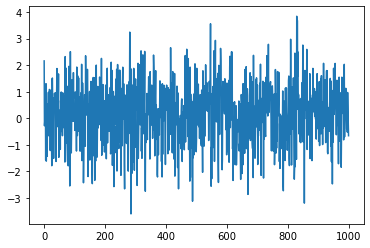

In [5]:
k = 4
time = 1000
rewards = np.zeros(time)
reward_t = []
mean_rewards = []
q = np.zeros(k) #intialize all q with zero
actions = np.arange(k)
action_count = np.zeros(k)
cnt = 0 
idx = 0
eps = t_epsilon[0]

for t in tqdm(range(time)):
    if cnt==100:
        eps = t_epsilon[idx]
        idx+= 1
        cnt = 0
        print(eps)
    cnt+=1
    
    #epsilon greedy
    if np.random.rand() < eps:
        a = np.random.choice(actions) #than choose a random action
    else:
        q_best = np.max(q)
        a = np.random.choice(np.where(q == q_best)[0])

    reward = np.random.randn() + bandit(a) #adding random noise to distribution for more realastic setting
    action_count[a] += 1
    q[a] += (reward - q[a]) / action_count[a]
    rewards[t] = reward

reward_t.append(rewards)    
print(action_count)
mean_rewards.append(rewards.mean(axis=0))

print(mean_rewards) #[0.040462506349467346]
plt.plot(reward_t[0], label='epsilon t')

# Q3

100%|██████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 166804.69it/s]


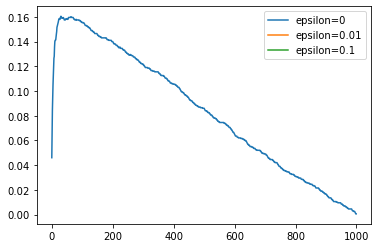

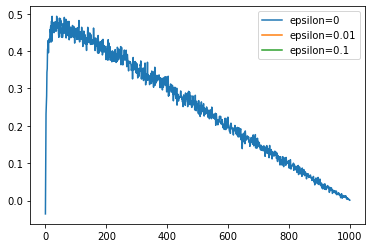

In [12]:
mean_rewards_1 = []
runs = 2000
time = 1000
mean = 0
variance = 1
mean_actions_1 = []
k = 10
epsilon = [0, 0.01, 0.1]

for eps in epsilon:
    rewards = np.zeros((runs, time))
    best_action_count = np.zeros((runs, time))
    for run in tqdm(range(runs)):
        q_true = np.random.normal(mean, variance, k)
        q = np.zeros(k)
        actions = np.arange(k)
        a_star = np.argmax(q_true)
        action_count = np.zeros(k)
        for time in range(time):
            if np.random.rand() < eps:
                a = np.random.choice(actions)
            else:
                q_best = np.max(q)
                a = np.random.choice(np.where(q == q_best)[0])
            reward = np.random.randn() + q_true[a]
            action_count[a] += 1
            q[a] += (reward - q[a]) / action_count[a]
            rewards[run, time] = reward
            if a == a_star:
                best_action_count[run, time] += 1
    mean_rewards_1.append(rewards.mean(axis=0))
    mean_actions_1.append(best_action_count.mean(axis=0))

#print(mean_rewards_1)
plt.plot(mean_actions_1[0], label='epsilon=0')
plt.plot(mean_actions_1[1], label='epsilon=0.01')
plt.plot(mean_actions_1[2], label='epsilon=0.1')
plt.legend()
plt.show()
plt.plot(mean_rewards_1[0], label='epsilon=0')
plt.plot(mean_rewards_1[1], label='epsilon=0.01')
plt.plot(mean_rewards_1[2], label='epsilon=0.1')
plt.legend()
plt.show()


# Q4 

100%|██████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 125109.74it/s]

[array([0.0435, 0.07  , 0.0855, 0.0985, 0.107 , 0.112 , 0.117 , 0.1195,
       0.12  , 0.121 , 0.1215, 0.1215, 0.122 , 0.122 , 0.123 , 0.1245,
       0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1235, 0.1235, 0.1235,
       0.1235, 0.1235, 0.123 , 0.1225, 0.122 , 0.122 , 0.122 , 0.1215,
       0.1215, 0.1215, 0.121 , 0.1205, 0.1205, 0.1205, 0.1205, 0.12  ,
       0.12  , 0.12  , 0.12  , 0.12  , 0.12  , 0.12  , 0.12  , 0.12  ,
       0.12  , 0.12  , 0.12  , 0.12  , 0.1195, 0.119 , 0.119 , 0.119 ,
       0.1185, 0.1185, 0.1185, 0.1185, 0.1185, 0.118 , 0.118 , 0.1175,
       0.1175, 0.117 , 0.117 , 0.1165, 0.116 , 0.1155, 0.115 , 0.1145,
       0.1145, 0.114 , 0.1135, 0.113 , 0.1125, 0.1125, 0.1125, 0.1125,
       0.112 , 0.112 , 0.1115, 0.1115, 0.1115, 0.111 , 0.111 , 0.1105,
       0.11  , 0.11  , 0.11  , 0.11  , 0.11  , 0.11  , 0.1095, 0.1095,
       0.1095, 0.1095, 0.109 , 0.1085, 0.1085, 0.1085, 0.1085, 0.1085,
       0.1085, 0.1085, 0.1085, 0.1085, 0.108 , 0.108 , 0.108 , 0.1075,
     

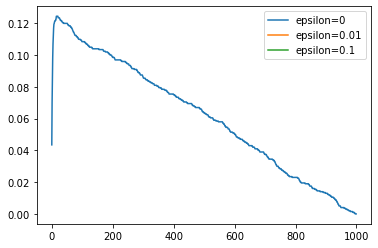

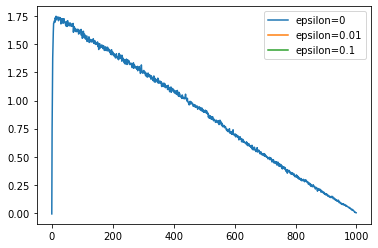

In [7]:
k = 10

mean = 0
runs = 2000
time = 1000
mean_rewards_2 = []
mean_actions_2 = []
variance = 4
epsilon = [0, 0.01, 0.1]

for eps in epsilon:
    rewards = np.zeros((runs, time))
    best_action_count = np.zeros((runs, time))
    for run in tqdm(range(runs)):
        q_true = np.random.normal(mean, variance, k)
        q = np.zeros(k)
        actions = np.arange(k)
        a_star = np.argmax(q_true)
        action_count = np.zeros(k)
        for time in range(time):
            if np.random.rand() < eps:
                a = np.random.choice(actions)
            else:
                q_best = np.max(q)
                a = np.random.choice(np.where(q == q_best)[0])
            reward = np.random.randn() + q_true[a]
            action_count[a] += 1
            q[a] += (reward - q[a]) / action_count[a]
            rewards[run, time] = reward
            if a == a_star:
                best_action_count[run, time] += 1
    mean_rewards_2.append(rewards.mean(axis=0))
    mean_actions_2.append(best_action_count.mean(axis=0))
    
print(mean_actions_2)    
plt.plot(mean_actions_2[0], label='epsilon=0')
plt.plot(mean_actions_2[1], label='epsilon=0.01')
plt.plot(mean_actions_2[2], label='epsilon=0.1')
plt.legend()
plt.show()
plt.plot(mean_rewards_2[0], label='epsilon=0')
plt.plot(mean_rewards_2[1], label='epsilon=0.01')
plt.plot(mean_rewards_2[2], label='epsilon=0.1')
plt.legend()
plt.show()


# Q5

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 213.58it/s]


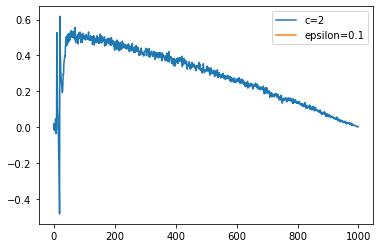

In [8]:
k = 10
runs = 2000
variance = 1
UCB_param = 2
time = 1000
mean = 0
step_size = 0.1


def ucb(runs, time, mean, variance, k, UCB_param, step_size):
    mean_rewards_4 = []
    mean_actions_4 = []
    rewards = np.zeros((runs, time))
    best_action_count = np.zeros((runs, time))
    for run in tqdm(range(runs)):
        q_true = np.random.normal(mean, variance, k)
        q = np.zeros(k)
        actions = np.arange(k)
        a_star = np.argmax(q_true)
        action_count = np.zeros(k)
        for time in range(time):
            UCB_estimation = q + UCB_param * np.sqrt(np.log(time + 1) / (action_count + 1e-5))
            q_best = np.max(UCB_estimation)
            a = np.random.choice(np.where(UCB_estimation == q_best)[0])   

            reward = np.random.randn() + q_true[a]
            action_count[a] += 1            
            q[a] += step_size * (reward - q[a])
            rewards[run, time] = reward
            if a == a_star:
                best_action_count[run, time] += 1
    mean_rewards_4.append(rewards.mean(axis=0))
    mean_actions_4.append(best_action_count.mean(axis=0))
    return mean_rewards_4, mean_actions_4


mean_rewards_4, mean_actions_4 = ucb(runs, time, mean, variance, k, UCB_param, step_size)
plt.plot(mean_rewards_4[0], label='c=2')
plt.plot(mean_rewards_1[2], label='epsilon=0.1')
plt.legend()
plt.show()

# Q6

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 41.61it/s]


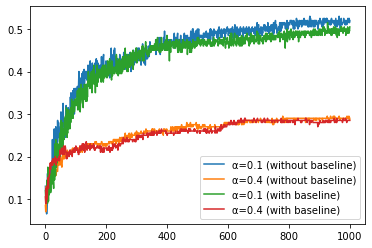

In [9]:
k = 10
runs = 200
time = 1000
mean = 4
variance = 1
gradient_baseline = [False, False, True, True]
alphas = [0.1, 0.4, 0.1, 0.4]
mean_actions_5 = []

for alpha in alphas:
    best_action_count = np.zeros((runs, time))
    for r in tqdm(range(runs)):
        q_true = np.random.normal(mean, variance, k)
        q = np.zeros(k)
        actions = np.arange(k)
        a_star = np.argmax(q_true)
        action_count = np.zeros(k)
        average_reward = 0
        for t in range(time):
            if np.random.rand() < 0:
                a = np.random.choice(actions)
            else:
                exp_est = np.exp(q)
                action_prob = exp_est / np.sum(exp_est)
                a = np.random.choice(actions, p=action_prob)
            reward = np.random.randn() + q_true[a]
            action_count[a] += 1
            average_reward += (reward - average_reward) / time
            one_hot = np.zeros(k)
            one_hot[a] = 1
            if gradient_baseline:
                baseline = average_reward
            else:
                baseline = 0
            q += alpha * (reward - baseline) * (one_hot - action_prob)
            if a == a_star:
                best_action_count[r, t] += 1
                
    mean_actions_5.append(best_action_count.mean(axis=0))
    
plt.plot(mean_actions_5[0], label='α=0.1 (without baseline)')
plt.plot(mean_actions_5[1], label='α=0.4 (without baseline)')
plt.plot(mean_actions_5[2], label='α=0.1 (with baseline)')
plt.plot(mean_actions_5[3], label='α=0.4 (with baseline)')
plt.legend()
plt.show()